In [1]:
import os

# Directory containing the CSV files
directory = '/scratch/cognit/filtered_workloads'

# User ID to search for
target_user_id = '72781180556911'

# List to hold the names of files where the user ID is found
matching_files = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        try:
            with open(file_path, 'r') as file:
                # Read the header
                header = file.readline().strip().split(',')
                # Read the first line of data
                first_line = file.readline().strip().split(',')
                
                # Create a dictionary from the header and first line
                data = dict(zip(header, first_line))
                
                # Check if the target user ID is in the 'id_user' field
                if 'id_user' in data and data['id_user'] == target_user_id:
                    matching_files.append(filename)
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Print out the matching file names
for match in matching_files:
    print(match)


20988.csv
475.csv
12812.csv
1107.csv
23248.csv
17314.csv
0.csv
18208.csv
24154.csv
18625.csv
4974.csv
12808.csv
1209.csv
17798.csv
16666.csv
12911.csv
9042.csv
16458.csv
22673.csv
760.csv
22013.csv
2678.csv
24407.csv
23288.csv
5241.csv
20271.csv
18916.csv
17592.csv
5092.csv
7790.csv
19565.csv
8061.csv
12380.csv
5958.csv
20837.csv
25017.csv
15014.csv
25293.csv
23862.csv
176.csv
24610.csv
18609.csv
14906.csv
20926.csv
18551.csv
22319.csv
16379.csv
23606.csv
24621.csv
9203.csv
11268.csv
24065.csv
17669.csv
1576.csv
5631.csv
2769.csv
9590.csv
9476.csv
1832.csv
4724.csv
18608.csv
12742.csv
16637.csv
14165.csv
18866.csv
21007.csv
14424.csv
13608.csv
20853.csv
17492.csv
17684.csv
23523.csv
15338.csv
16942.csv
21303.csv
11206.csv
16859.csv
11671.csv
25830.csv
23858.csv
19637.csv
6906.csv
21054.csv
19092.csv
24887.csv
7940.csv
16129.csv
2020.csv
25837.csv
25472.csv
16369.csv
7585.csv
6470.csv
10086.csv
3576.csv
11618.csv
13165.csv
8683.csv
11011.csv
25201.csv
22632.csv
2780.csv
3689.csv
18326.c

In [4]:
!pip install hmmlearn 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.9/160.9 kB 3.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


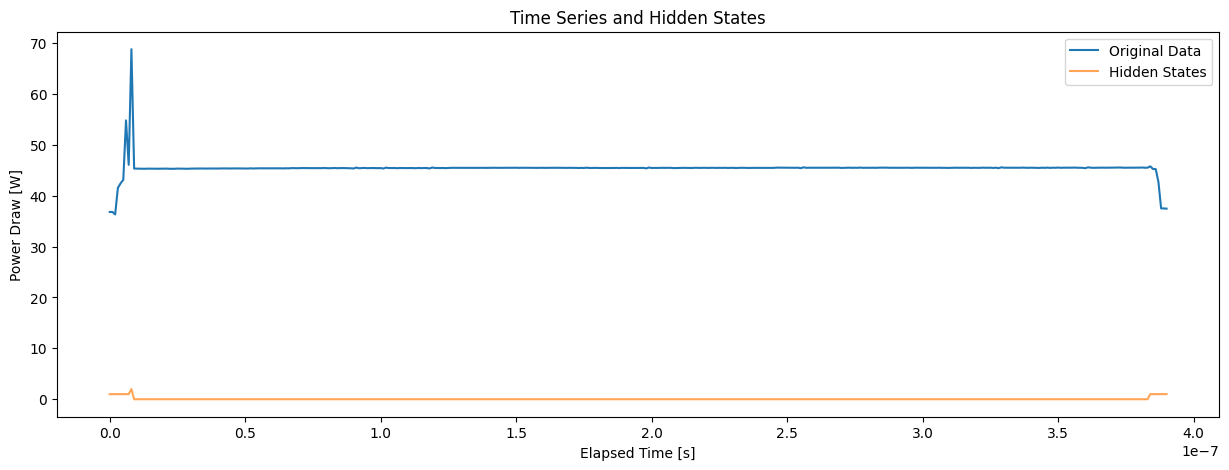

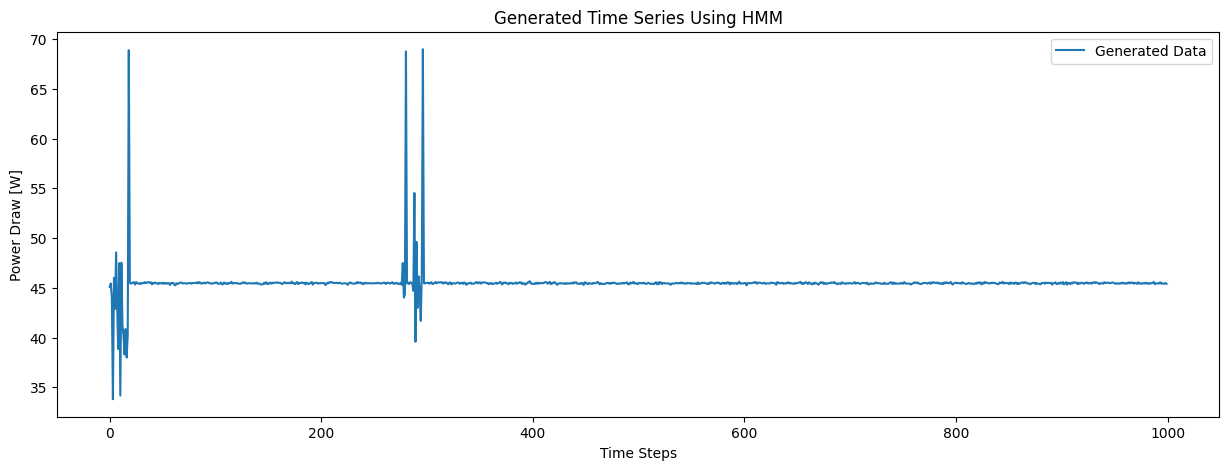

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Load and preprocess the data
file_path = '/scratch/cognit/filtered_workloads/7.csv'
data = pd.read_csv(file_path, usecols=['timestamp', 'power_draw_W'])

# Convert timestamp to elapsed time in seconds (assuming the timestamps are in a standard datetime format)
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['elapsed_time_s'] = (data['timestamp'] - data['timestamp'].iloc[0]).dt.total_seconds()

# Use only the power_draw_W column for HMM modeling
power_data = data['power_draw_W'].values
normalized_power_data = (power_data - np.mean(power_data)) / np.std(power_data)
X = normalized_power_data.reshape(-1, 1)

# Define the number of hidden states
n_states = 3

# Define the HMM model
model = hmm.GaussianHMM(n_components=n_states, covariance_type="full")

# Fit the model
model.fit(X)

# Decode the hidden states
hidden_states = model.predict(X)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(data['elapsed_time_s'], power_data, label='Original Data')
plt.plot(data['elapsed_time_s'], hidden_states, label='Hidden States', alpha=0.7)
plt.xlabel('Elapsed Time [s]')
plt.ylabel('Power Draw [W]')
plt.legend()
plt.title('Time Series and Hidden States')
plt.show()

# Generate a new time series of specified length
time_length = 1000  # Specify the desired length of the generated time series
generated_data, generated_states = model.sample(time_length)

# Denormalize the generated data to the original scale
denormalized_generated_data = generated_data * np.std(power_data) + np.mean(power_data)

# Plot the generated time series
plt.figure(figsize=(15, 5))
plt.plot(range(time_length), denormalized_generated_data, label='Generated Data')
plt.xlabel('Time Steps')
plt.ylabel('Power Draw [W]')
plt.legend()
plt.title('Generated Time Series Using HMM')
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Directory containing the CSV files
directory = '/scratch/cognit/filtered_workloads'

# User ID to search for
target_user_id = '72781180556911'

# List to hold the names of files where the user ID is found
matching_files = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        try:
            # Read the CSV file in chunks to handle large files efficiently
            for chunk in pd.read_csv(file_path, chunksize=10000):
                if target_user_id in chunk['id_user'].astype(str).values:
                    matching_files.append(filename)
                    break
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Load and combine the data from the matching files
combined_data = pd.DataFrame()

for filename in matching_files:
    file_path = os.path.join(directory, filename)
    try:
        data = pd.read_csv(file_path, usecols=['timestamp', 'power_draw_W'])
        combined_data = pd.concat([combined_data, data])
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# Convert timestamp to elapsed time in seconds
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'])
combined_data.sort_values(by='timestamp', inplace=True)
combined_data['elapsed_time_s'] = (combined_data['timestamp'] - combined_data['timestamp'].iloc[0]).dt.total_seconds()

# Use only the power_draw_W column for HMM modeling
power_data = combined_data['power_draw_W'].values
normalized_power_data = (power_data - np.mean(power_data)) / np.std(power_data)
X = normalized_power_data.reshape(-1, 1)

# Define the number of hidden states
n_states = 3

# Define the HMM model
model = hmm.GaussianHMM(n_components=n_states, covariance_type="full")

# Fit the model
model.fit(X)

# Decode the hidden states
hidden_states = model.predict(X)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(combined_data['elapsed_time_s'], power_data, label='Original Data')
plt.plot(combined_data['elapsed_time_s'], hidden_states, label='Hidden States', alpha=0.7)
plt.xlabel('Elapsed Time [s]')
plt.ylabel('Power Draw [W]')
plt.legend()
plt.title('Time Series and Hidden States')
plt.show()

# Generate a new time series of specified length
time_length = 1000  # Specify the desired length of the generated time series
generated_data, generated_states = model.sample(time_length)

# Denormalize the generated data to the original scale
denormalized_generated_data = generated_data * np.std(power_data) + np.mean(power_data)

# Plot the generated time series
plt.figure(figsize=(15, 5))
plt.plot(range(time_length), denormalized_generated_data, label='Generated Data')
plt.xlabel('Time Steps')
plt
